In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [408]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [409]:
pokemon = pokemon[["name", "type1", "type2", "generation"]]
pokemon = pokemon[pokemon['type2'].notnull()]

In [410]:
# Do we need to normalise this? Yeah...
print(len(pokemon))
print(len(pokemon[pokemon['type1'] > pokemon['type2']]))

417
224


In [411]:
types = sorted([x for x in pokemon['type1'].unique()])
if 'nan' in types:
    types.remove('nan')
type_relations_abs = pd.DataFrame(
    [pd.Series([0 for t in types], index=types, name=t) for t in types], 
    columns=types
)
type_relations_rel = pd.DataFrame(
    [pd.Series([0.0 for t in types], index=types, name=t) for t in types], 
    columns=types
)
for i in range(len(pokemon)):
    p = pokemon.iloc[i]
    t1 = p['type1']
    t2 = p['type2']
    if str(t2) == 'nan':
        type_relations_abs[t1][t2] += 1    
    elif t1 != t2: 
        type_relations_abs[t1][t2] += 1
        type_relations_abs[t2][t1] += 1
for i in range(len(type_relations_abs)):
    row_abs = type_relations_abs.iloc[i]
    row_rel = type_relations_rel.iloc[i]
    for j in range(len(row)):
        row_rel[j] = float(row_abs[j]) / float(sum(row_abs))

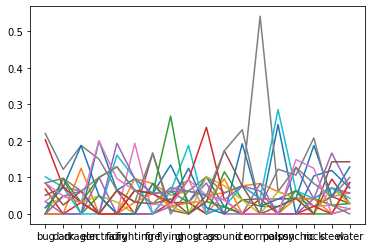

In [412]:
plt.plot(type_relations_rel)
plt.show()

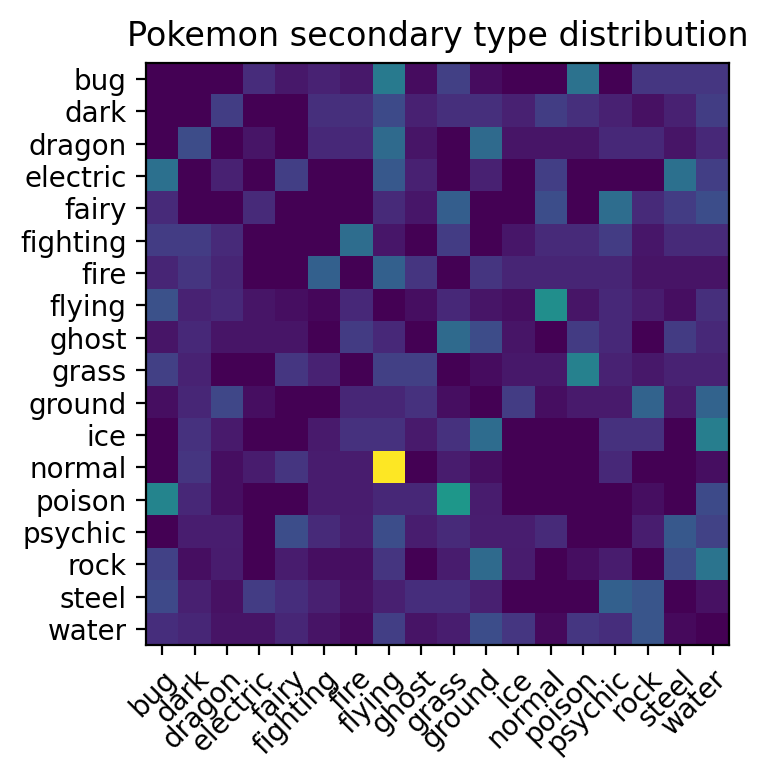

In [413]:
fig, ax = plt.subplots()
fig.set_dpi(200)
im = ax.imshow(type_relations_rel)

# We want to show all ticks...
ax.set_xticks(range(len(types)))
ax.set_yticks(range(len(types)))
# ... and label them with the respective list entries
ax.set_xticklabels(types)
ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")



ax.set_title("Pokemon secondary type distribution")
fig.tight_layout()
plt.show()

In [414]:
colors = ['#95B309', '#674B3B', '#6F1DF3', '#FECA0C', '#DF74A4', '#CC1119', '#FD6F07', '#A67FF2', '#6C498F', '#52C431', '#E5B650', '#75D5D0', '#9a9D69','#A82A97', '#FF397A', '#B19813', '#AEAEC8', '#4F84EF']

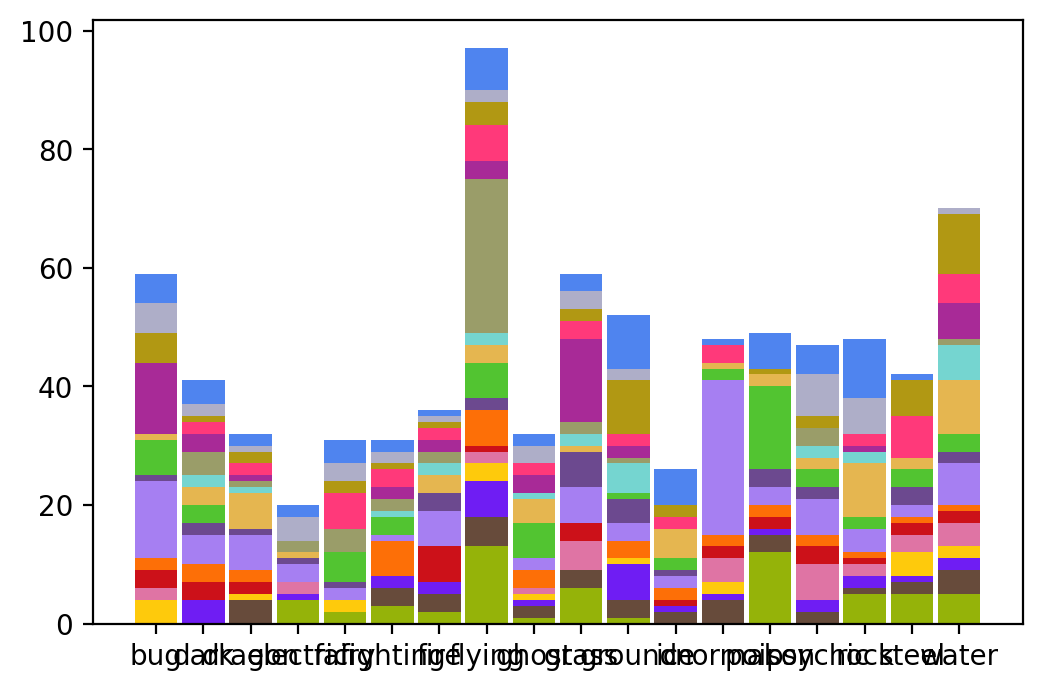

In [415]:
fig, axs = plt.subplots()
fig.set_dpi(200)

l = len(types)
prev = [0.0 for i in range(l)]
for i in range(l):
    cur = [type_relations_abs.iloc[j][i] for j in range(l)]
    plt.bar(types, cur, 0.9, label=types[i], bottom=prev, color=colors[i])
    prev=[prev[i] + cur[i] for i in range(len(prev))]

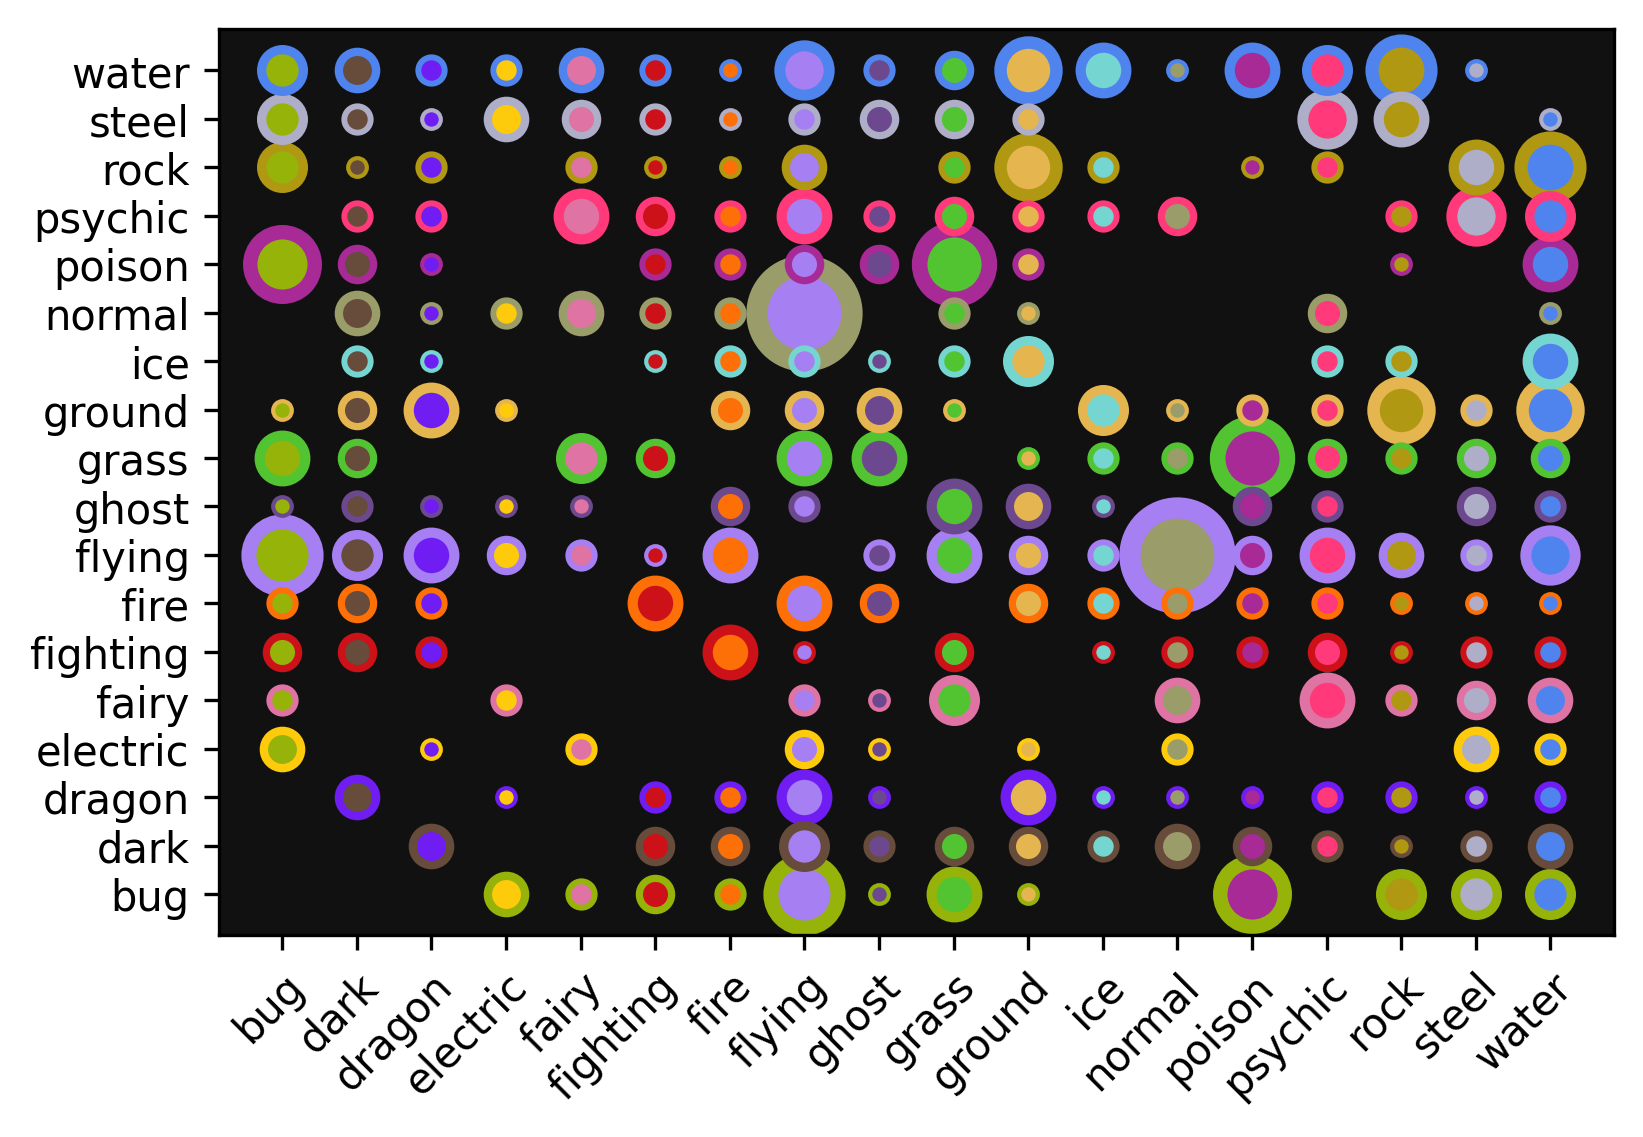

In [416]:
fig, axs = plt.subplots()
fig.set_dpi(300)
axs.set_facecolor("#111111")
l = len(types)
#plt.bar(types, [l for _ in types], color=colors, width=1)
markers = []
for i in range(l):
    for j in range(l):
        s = type_relations_abs.iloc[i][j]*100
        markers.append((i, j, s/5.0, colors[i], colors[j], 0.1*s**0.5))
for m in sorted(markers, key=lambda x: x[2], reverse=True):
    plt.scatter(m[0], m[1], s=m[2], c=m[3], edgecolors=m[4], linewidth=m[5])
# We want to show all ticks...
axs.set_xticks(range(len(types)))
axs.set_yticks(range(len(types)))
# ... and label them with the respective list entries
axs.set_xticklabels(types)
axs.set_yticklabels(types)
plt.setp(axs.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

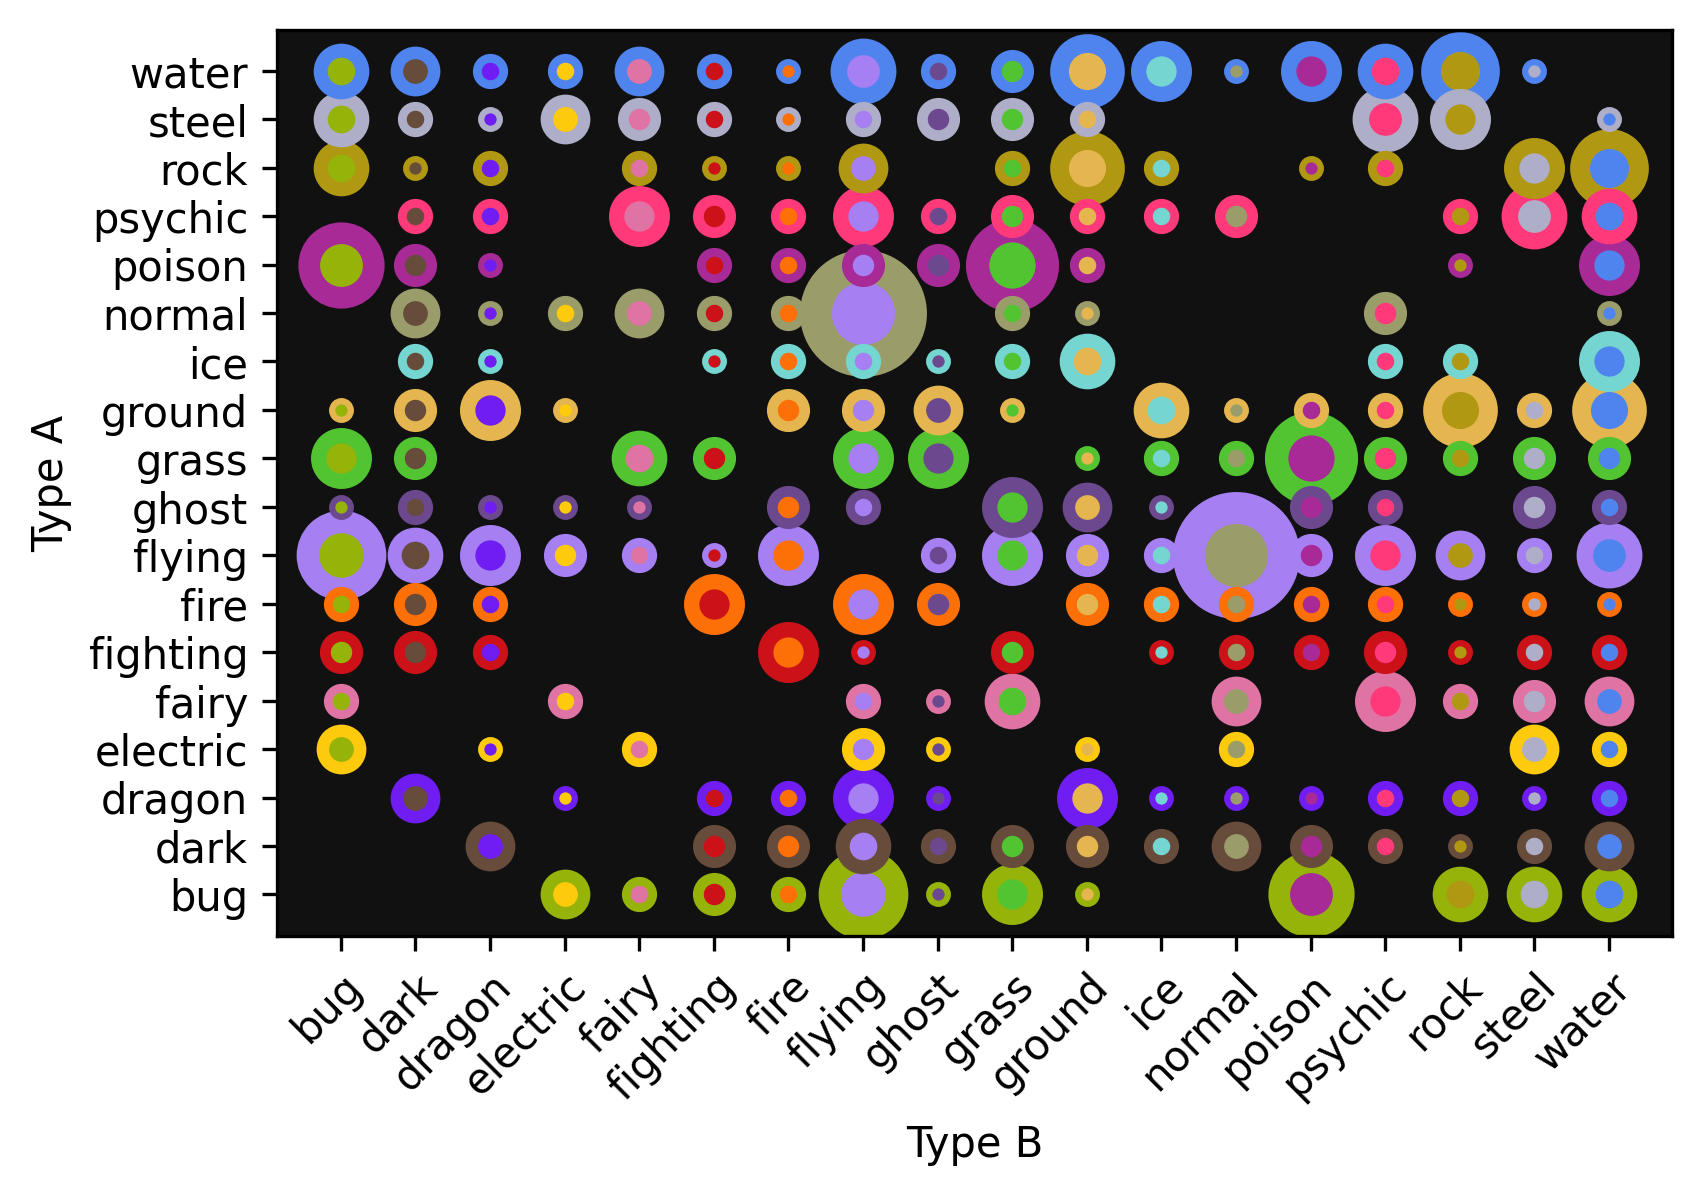

In [431]:
def log(x):
    if x > 0:
        return math.log10(x)
    return 0.0

fig, axs = plt.subplots()
fig.set_dpi(300)
axs.set_facecolor("#111111")
l = len(types)
#plt.bar(types, [l for _ in types], color=colors, width=1)
markers = []
total_count = len(pokemon)
counts = [float(sum(type_relations_abs.iloc[i])) for i in range(l)]
fracts = [x / sum(counts) for x in counts]
for i in range(l):
    for j in range(l):
        s = type_relations_abs.iloc[i][j]*10**2
        x = i
        y = j
        markers.append((x, y, s/5.0, colors[i], colors[j], 0.15*s**0.5))
for m in sorted(markers, key=lambda x: x[2], reverse=True):
    plt.scatter(m[0], m[1], s=m[2], c=m[3], edgecolors=m[4], linewidth=m[5])
# We want to show all ticks...
axs.set_xticks(range(len(types)))
axs.set_yticks(range(len(types)))
# ... and label them with the respective list entries
axs.set_xticklabels(types)
axs.set_yticklabels(types)
plt.setp(axs.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
axs.set_ylabel("Type A")
axs.set_xlabel("Type B")
plt.show()